# LLM Based Workflow

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv()
GROQ_API_KEY=os.environ.get("GROQ_API_KEY")

In [ ]:
from langchain_groq import ChatGroq
llm =ChatGroq(model ="llama-3.3-70b-versatile")

In [52]:
# Set inmemory llm cache
from langchain_core.globals import set_llm_cache
from langchain_core.caches import InMemoryCache
set_llm_cache(InMemoryCache())

In [65]:
# Define the LLM State
from typing import TypedDict

class LLMState(TypedDict):
    question: str
    answer:   str

In [ ]:
#Define the LLM
def LLM_response(state:LLMState) -> LLMState:

    #Extract the question from state

    question=state["question"]

    #Form the prompt

    prompt =f"Please Give the short answers of {question}"

    #Ask the question from model/LLM
    answer=llm.invoke(prompt).content

    #Update the state
    state["answer"]=answer

    return state


In [ ]:
from langgraph.graph import StateGraph,START,END
workflow=StateGraph(LLMState)

#Add the nodes
workflow.add_node("LLM",LLM_response)

#Add the Edges
workflow.add_edge(START,"LLM")
workflow.add_edge("LLM",END)
#Compile the workflow
graph = workflow.compile()

In [71]:
#Execute the Graph

result =graph.invoke({"question":"What is human heart beat rate in 20 years age "})
print(result)

{'question': 'What is human heart beat rate in 20 years age ', 'answer': 'The normal heart beat rate for a 20-year-old is between **60-100 beats per minute (bpm)**.'}


In [72]:
print(result["answer"])

The normal heart beat rate for a 20-year-old is between **60-100 beats per minute (bpm)**.


# Non LLM Based workflow

In [53]:
from typing import TypedDict

# Define the state
class BMIState(TypedDict):
    weight_kg:float
    height_meter:float
    bmi:float
    category:str

In [54]:
def BMI(state:BMIState) ->BMIState:
    weight_kg=state['weight_kg']
    height_meter=state['height_meter']

    bmi=(weight_kg) / ( height_meter ** 2)

    state['bmi']=round(bmi,2)
    return state

In [60]:
#Category
def label_BMI(state: BMIState) -> BMIState:
    bmi=state["bmi"]

    if bmi < 18:
        state["category"]="UnderWeight"

    elif 18.5 < bmi < 25:
        state["category"] = "Normal"

    elif 25.5 < bmi <30 :
        state["category"]= "Overweight"
    else:
        state["category"]="Obes"
    
    return state

In [61]:
from langgraph.graph import StateGraph,START,END
#Define the workflow
workflow=StateGraph(BMIState)

In [62]:
#Define the Node

workflow.add_node("CalculateBMI",BMI)
workflow.add_node("Label",label_BMI)
#Define the edges
workflow.add_edge(START,"CalculateBMI")
workflow.add_edge("CalculateBMI","Label")
workflow.add_edge("Label",END)

#Execute the workflow
graph=workflow.compile()

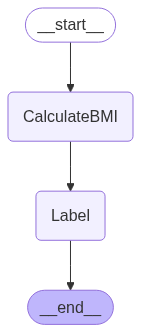

In [63]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [64]:
#Execute the workflow
initial_state={"weight_kg":34.4,'height_meter':1.3}

final_result=graph.invoke(initial_state)

print(final_result)


{'weight_kg': 34.4, 'height_meter': 1.3, 'bmi': 20.36, 'category': 'Normal'}
